In [0]:
import numpy as np

In [0]:
from sklearn import datasets

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
vinhos = datasets.load_wine()

In [45]:
print(vinhos.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [46]:
nome_atributos = vinhos.feature_names
nome_atributos

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [0]:
x = vinhos.data
y = vinhos.target

In [48]:
len(x)

178

In [49]:
x[:,0]

array([14.23, 13.2 , 13.16, 14.37, 13.24, 14.2 , 14.39, 14.06, 14.83,
       13.86, 14.1 , 14.12, 13.75, 14.75, 14.38, 13.63, 14.3 , 13.83,
       14.19, 13.64, 14.06, 12.93, 13.71, 12.85, 13.5 , 13.05, 13.39,
       13.3 , 13.87, 14.02, 13.73, 13.58, 13.68, 13.76, 13.51, 13.48,
       13.28, 13.05, 13.07, 14.22, 13.56, 13.41, 13.88, 13.24, 13.05,
       14.21, 14.38, 13.9 , 14.1 , 13.94, 13.05, 13.83, 13.82, 13.77,
       13.74, 13.56, 14.22, 13.29, 13.72, 12.37, 12.33, 12.64, 13.67,
       12.37, 12.17, 12.37, 13.11, 12.37, 13.34, 12.21, 12.29, 13.86,
       13.49, 12.99, 11.96, 11.66, 13.03, 11.84, 12.33, 12.7 , 12.  ,
       12.72, 12.08, 13.05, 11.84, 12.67, 12.16, 11.65, 11.64, 12.08,
       12.08, 12.  , 12.69, 12.29, 11.62, 12.47, 11.81, 12.29, 12.37,
       12.29, 12.08, 12.6 , 12.34, 11.82, 12.51, 12.42, 12.25, 12.72,
       12.22, 11.61, 11.46, 12.52, 11.76, 11.41, 12.08, 11.03, 11.82,
       12.42, 12.77, 12.  , 11.45, 11.56, 12.42, 13.05, 11.87, 12.07,
       12.43, 11.79,

(array([59.,  0.,  0.,  0.,  0., 71.,  0.,  0.,  0., 48.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

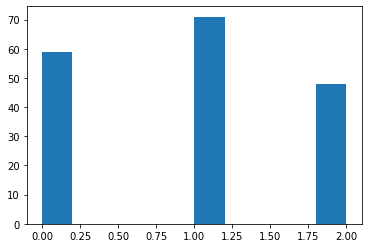

In [50]:
plt.hist(y)

Text(0, 0.5, 'Intensidade de cor')

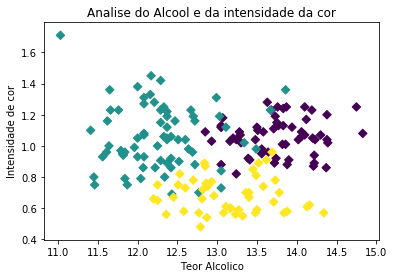

In [51]:
plt.scatter(x[:,0], x[:,10], c=y, cmap="viridis", marker='D')
plt.title("Analise do Alcool e da intensidade da cor")
plt.xlabel("Teor Alcolico")
plt.ylabel("Intensidade de cor")

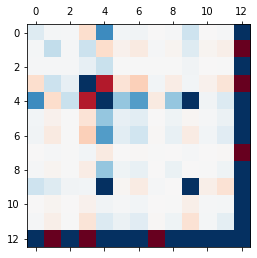

In [55]:
x_corr = np.cov(x.T) 
x_corr
plt.matshow(x_corr, vmin=-5, vmax=5, cmap="RdBu")

In [62]:
from sklearn import neighbors
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=42)

knn = neighbors.KNeighborsClassifier(3)
knn.fit(x_train, y_train)
knn.score(x_test, y_test)

0.7407407407407407

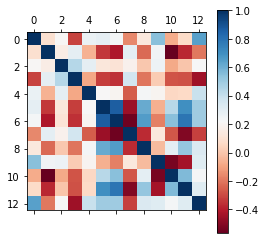

In [66]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_escalonado = scaler.fit_transform(x)

x_corr = np.cov(x_escalonado.T)
plt.matshow(x_corr, cmap="RdBu")
plt.colorbar()

In [67]:
from sklearn import neighbors
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_escalonado,y,test_size=0.3, random_state=42)

knn = neighbors.KNeighborsClassifier(3)
knn.fit(x_train, y_train)
knn.score(x_test, y_test)

0.9629629629629629